## Import the libraries and the dataset

In [1]:
# Importing Pandas an Numpy Libraries to use on manipulating our Data
import pandas as pd
import numpy as np

# To Preproccesing our data
from sklearn.preprocessing import LabelEncoder

# To fill missing values
from sklearn.impute import SimpleImputer

# To Split our train data
from sklearn.model_selection import train_test_split

# To Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns

# To Train our data
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB

# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

#Adding scripts path
import sys, os
sys.path.insert(0,'../scripts/')

from data_Preprocess import CleanDataFrame
from data_info import DataInfo 
from VisualisationPlots import VisualiseDf



## Exploring the dataset that we have

In [2]:
# importing dataset
df = pd.read_csv("../dataOLD/AdSmartABdata.csv")
df.head()


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [3]:
# getting users who only answers yes or no
response = df[df['yes'] == 1].append(df[df['no'] == 1])
response.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0


In [4]:
# merge the yes and no columns into a single response column
df1 = response[response['yes'] == 1].drop(['yes','no'], axis = 1)
df1['response'] = 1
df2 = response[response['no'] == 1].drop(['yes','no'], axis = 1)
df2['response'] = 0
response_clean = df1.append(df2).reset_index(drop=True)
response_clean.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
1,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
2,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1
3,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1
4,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1


In [5]:
# save
response_clean.to_csv('../data/clean_AdSmartABdata.csv')

* Here at this point, a first version of the data into gdrive was saved. 

<img src="../data/push_v1.jpg"
     alt="version1"
     style="float:left;margin-right:10px;">

In [6]:
# One hot encoder

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# 
response_clean['experiment'] = label_encoder.fit_transform(response_clean['experiment'])
response_clean['date'] = label_encoder.fit_transform(response_clean['date'])
response_clean['hour'] = label_encoder.fit_transform(response_clean['hour'])
response_clean['device_make'] = label_encoder.fit_transform(response_clean['device_make'])
response_clean['platform_os'] = label_encoder.fit_transform(response_clean['platform_os'])
response_clean['browser'] = label_encoder.fit_transform(response_clean['browser'])
response_clean['response'] = label_encoder.fit_transform(response_clean['response'])

In [7]:
# browser only df
browser_df = response_clean[["experiment", "date", "hour", "device_make", "browser", "response"]]
browser_df.to_csv("../data/clean_AdSmartABdata.csv")

* browser only df was saved using dvc from bash terminal. So thats why there are two folders the first one is for the first versioning as shown above.

<img src="../data/browser_encoded.jpg"
     alt="Browser encoded V1"
     style="float:left;margin-right:10px;">

In [10]:
# and do the same to get 'platform_df'
platfrom_df = response_clean[["experiment", "date" , "hour", "device_make", "platform_os", "response"]]
platfrom_df.to_csv("../data/clean_AdSmartABdata.csv")

* Platform encoded V1

<img src="../data/platformEncV1.jpg"
alt="Browser encoded V1"
style="float:left;margin-right:10px;">

# Splitting the data for training


In [13]:
# For browser df: X1: prediction freatures,y1:target feature
X1 = browser_df.drop('response', axis=1) #prediction feature
y1 = browser_df['response'] #target feature
# 
# For Platform df: X11: prediction freatures,y11:target feature
X11 = platfrom_df.drop('response', axis=1) #prediction features
y11 = platfrom_df['response'] #target feature

In [14]:
# Splitting our dataset into training and testing dataset
#training set 70%, 20% validation, test set 10%

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, random_state=42)

X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11, test_size=0.1, random_state=42)


# 1. Logistic regression

### 1.1 using Browser df

* Cross validation is a statistical method used to estimate the skill of machine learning models. For a k-fold cross validation, there are common tactics that can be used to choose k. In our case k = 5.

In [15]:
# Define Logistic Regression Model
log = LogisticRegression()
# We fit our model with our train data
log.fit(X1_train, y1_train)
# Then predict results from X_test data
pred_log = log.predict(X1_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_log[0:10])
print("Actual:", y1_test[0:10])

Predicted: [0 0 1 0 0 0 0 0 1 0]
Actual: 900     0
1003    0
671     0
620     0
926     0
997     0
745     0
938     0
451     1
439     1
Name: response, dtype: int64


In [16]:
# Applying the 5-fold Cross validation on logistic Regression model
regressor=LogisticRegression(random_state=None)
regressor.fit(X1_train,y1_train) 
scores=cross_val_score(estimator=regressor,X=X1_train,y=y1_train,cv=5,scoring='accuracy')
print(scores)
print('Mean LogisticRegression score :',scores.mean())

[0.54017857 0.52678571 0.57589286 0.53363229 0.52914798]
Mean LogisticRegression score : 0.5411274823830878


In [17]:
# save score
scores1 = pd.DataFrame(scores,columns=['Scores']) 
scores1.head()

,Scores
0,0.540179
1,0.526786
2,0.575893
3,0.533632
4,0.529148


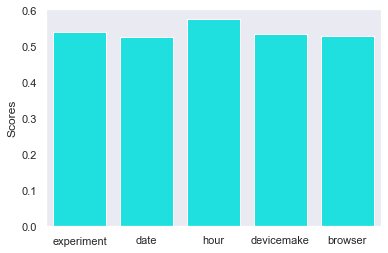

In [18]:
# plotting the accuracy score
sns.set(style="dark", rc={"lines.linewidth": 9})
sns.barplot(x=['experiment','date','hour','devicemake','browser'],y="Scores",data=scores1, color="cyan")
plt.show()
sns.set()

In [19]:
#feature coefficients
regressor.fit(X1 / np.std(X1, 0), y1)
print(regressor.coef_)

[[ 0.05343081 -0.00484439  0.1299312   0.06868544 -0.05886028]]


In [20]:
#plotting the feature importance
#The coefficients are both positive and negative.
# logistic regression for feature importance
from matplotlib import pyplot
# define the model
model = LogisticRegression()
# fit the model
model.fit(X1, y1)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.10595
Feature: 1, Score: -0.00185
Feature: 2, Score: 0.02261
Feature: 3, Score: 0.00247
Feature: 4, Score: -0.02966


* So the most important feature in this model is feature 2 (hour) with a score of 0.02261.

### 1.2 Using platform df

In [21]:
# Applying the 5-fold Cross validation on logistic Regression model
regressor=LogisticRegression(random_state=None)
regressor.fit(X11_train,y11_train) 
scores=cross_val_score(estimator=regressor,X=X11_train,y=y11_train,cv=5,scoring='accuracy')
print(scores)
print('Mean LogisticRegression score :',scores.mean())

[0.54464286 0.54017857 0.57142857 0.52017937 0.53363229]
Mean LogisticRegression score : 0.542012331838565


In [22]:
# saving the output to a pandas dataframe
scores1 = pd.DataFrame(scores,columns=['Scores']) 
scores1.head()

,Scores
0,0.544643
1,0.540179
2,0.571429
3,0.520179
4,0.533632


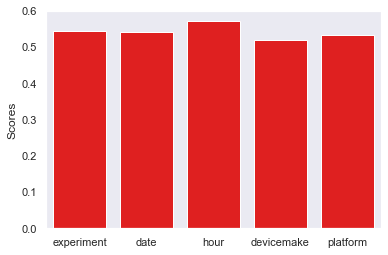

In [23]:
# plotting the accuracy score
sns.set(style="dark", rc={"lines.linewidth": 9})
sns.barplot(x=['experiment','date','hour','devicemake','platform'],y="Scores",data=scores1, color="red")
plt.show()
sns.set()

In [24]:
#feature coefficients
regressor.fit(X11 / np.std(X11, 0), y11)
print(regressor.coef_)

[[ 0.05509583 -0.0055177   0.12475151  0.06072356  0.09600945]]


In [25]:
#plotting the feature importance
#The coefficients are both positive and negative.
# logistic regression for feature importance
from matplotlib import pyplot
# define the model
model = LogisticRegression()
# fit the model
model.fit(X11, y11)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.11122
Feature: 1, Score: -0.00205
Feature: 2, Score: 0.02186
Feature: 3, Score: 0.00193
Feature: 4, Score: 0.63366


* Again, the most important feature in this model is feature 2 (hour) with a score of 0.02186.

In [28]:
LRModel = LogesticRegressionModel(X1_train, X1_test,  y1_train, y1_test)
clf2, loss_arr_2, acc_arr_2 = logesticRegressionModel.train(5)
logesticRegressionModel.write_model('browser_os_Logestic_Reg_model', clf2)

NameError: name 'LogesticRegressionModel' is not defined

In [5]:
# Prints Summary of Numerical Data
df.describe()

,age,trestbps,chol,thalach,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,1.399340,0.729373,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.616226,1.022606,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,2.000000,4.000000,1.000000


In [6]:
# Prints Summary of Categorical Data
df.describe(include=[np.object])

<ipython-input-6-0bcebb144525>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object])


,sex,cp,fbs,restecg,exang,thal
count,303,303,303,303,303,303
unique,2,4,2,3,2,4
top,Male,typical angina,normal,S-T abnormanilty,no,reversible deffect
freq,207,143,258,152,204,166


### Splitting Numerical and categorical variables

In [7]:
numerical_column = df.select_dtypes(exclude="object").columns.tolist()
categorical_column = df.select_dtypes(include="object").columns.tolist()
print("Numerical Columns:", numerical_column)
print("****************")
print("Categorical Columns:", categorical_column)

Numerical Columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'target']
****************
Categorical Columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']


### Exploring the categorical columns

In [8]:
df[categorical_column].describe()

,sex,cp,fbs,restecg,exang,thal
count,303,303,303,303,303,303
unique,2,4,2,3,2,4
top,Male,typical angina,normal,S-T abnormanilty,no,reversible deffect
freq,207,143,258,152,204,166


### Splitting the columns for one hot encoding and label encoding 

In [9]:
# Get column names have less than 10 more than 2 unique values
to_one_hot_encoding = [col for col in categorical_column if df[col].nunique() <= 10 and df[col].nunique() > 2]

# Get Categorical Column names thoose are not in "to_one_hot_encoding"
to_label_encoding = [col for col in categorical_column if not col in to_one_hot_encoding]

print("To One Hot Encoding:", to_one_hot_encoding)
print("To Label Encoding:", to_label_encoding)

To One Hot Encoding: ['cp', 'restecg', 'thal']
To Label Encoding: ['sex', 'fbs', 'exang']


### Investigating the missing values 

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Our data does not have any missing values

### One hot encoding and label encoding

In [11]:
# We will use built in pandas function "get_dummies()" to simply to encode "to_one_hot_encoding" columns
one_hot_encoded_columns = pd.get_dummies(df[to_one_hot_encoding])
one_hot_encoded_columns

,cp_asymptomatic,cp_atypical angina,cp_non anginal pain,cp_typical angina,restecg_2,restecg_S-T abnormanilty,restecg_normal,thal_deffect-3,thal_fixed deffect,thal_normal,thal_reversible deffect
0,1,0,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,0,1,0,1,0,0,0
299,1,0,0,0,0,1,0,1,0,0,0
300,0,0,0,1,0,1,0,1,0,0,0
301,0,0,0,1,0,1,0,1,0,0,0


In [12]:
# Label Encoding

label_encoded_columns = []
# For loop for each columns
for col in to_label_encoding:
    # We define new label encoder to each new column
    le = LabelEncoder()
    # Encode our data and create new Dataframe of it, 
    # notice that we gave column name in "columns" arguments
    column_dataframe = pd.DataFrame(le.fit_transform(df[col]), columns=[col] )
    # and add new DataFrame to "label_encoded_columns" list
    label_encoded_columns.append(column_dataframe)

# Merge all data frames
label_encoded_columns = pd.concat(label_encoded_columns, axis=1)
label_encoded_columns

,sex,fbs,exang
0,1,0,0
1,1,1,0
2,0,1,0
3,1,1,0
4,0,1,1
...,...,...,...
298,0,1,1
299,1,1,0
300,1,0,0
301,1,1,1


### Bring the data together

In [13]:
# Copy our DataFrame to X variable
X = df.copy()

# Droping Categorical Columns,
# "inplace" means replace our data with new one
# Don't forget to "axis=1"
X.drop(categorical_column, axis=1, inplace=True)

# Merge DataFrames
X = pd.concat([X, one_hot_encoded_columns, label_encoded_columns], axis=1)
print("All columns:", X.columns.tolist())
X

All columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'target', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non anginal pain', 'cp_typical angina', 'restecg_2', 'restecg_S-T abnormanilty', 'restecg_normal', 'thal_deffect-3', 'thal_fixed deffect', 'thal_normal', 'thal_reversible deffect', 'sex', 'fbs', 'exang']


,age,trestbps,chol,thalach,oldpeak,slope,ca,target,cp_asymptomatic,cp_atypical angina,...,restecg_2,restecg_S-T abnormanilty,restecg_normal,thal_deffect-3,thal_fixed deffect,thal_normal,thal_reversible deffect,sex,fbs,exang
0,63,145,233,150,2.3,0,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
1,37,130,250,187,3.5,0,0,1,0,0,...,0,1,0,0,0,0,1,1,1,0
2,41,130,204,172,1.4,2,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0
3,56,120,236,178,0.8,2,0,1,0,1,...,0,1,0,0,0,0,1,1,1,0
4,57,120,354,163,0.6,2,0,1,0,0,...,0,1,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,1
299,45,110,264,132,1.2,1,0,0,1,0,...,0,1,0,1,0,0,0,1,1,0
300,68,144,193,141,3.4,1,2,0,0,0,...,0,1,0,1,0,0,0,1,0,0
301,57,130,131,115,1.2,1,1,0,0,0,...,0,1,0,1,0,0,0,1,1,1


### Splitting the data to train and test sets

In [14]:
# Define Y (This is the value we will predict)
y = df["target"]

# Droping "class" from X
X.drop(["target"], axis=1, inplace=True)
X

,age,trestbps,chol,thalach,oldpeak,slope,ca,cp_asymptomatic,cp_atypical angina,cp_non anginal pain,...,restecg_2,restecg_S-T abnormanilty,restecg_normal,thal_deffect-3,thal_fixed deffect,thal_normal,thal_reversible deffect,sex,fbs,exang
0,63,145,233,150,2.3,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
1,37,130,250,187,3.5,0,0,0,0,1,...,0,1,0,0,0,0,1,1,1,0
2,41,130,204,172,1.4,2,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3,56,120,236,178,0.8,2,0,0,1,0,...,0,1,0,0,0,0,1,1,1,0
4,57,120,354,163,0.6,2,0,0,0,0,...,0,1,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,1
299,45,110,264,132,1.2,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
300,68,144,193,141,3.4,1,2,0,0,0,...,0,1,0,1,0,0,0,1,0,0
301,57,130,131,115,1.2,1,1,0,0,0,...,0,1,0,1,0,0,0,1,1,1


Now is the time to split the data to train and test sets

In [15]:
# You can specify test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Training the models

* Random Forest (It's my favorite)
* Desicion Tree
* Logistic Regression Classifier
* Bernouilli Naive Bias
* Gaussian Naive Bias
* KNN (K-Nearest Neighbors)
* XGBoost (It's new and have acurate predictions)

### Random Forest

In [16]:
# Define Random Forest Model
rf = RandomForestClassifier(n_estimators=100)

# We fit our model with our train data
rf.fit(X_train, y_train)

# Then predict results from X_test data
pred_rf = rf.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_rf[0:10])
print("Actual:", y_test[0:10])

Predicted: [0 1 1 0 0 0 1 1 0 0]
Actual: 271    0
177    0
75     1
205    0
284    0
59     1
182    0
160    1
269    0
240    0
Name: target, dtype: int64


### Decision Tree

In [17]:
# Define Decision Tree Model
dt = DecisionTreeClassifier()
# We fit our model with our train data
dt.fit(X_train, y_train)
# Then predict results from X_test data
pred_dt = dt.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_dt[0:10])
print("Actual:", y_test[0:10])

Predicted: [0 1 1 0 0 0 1 1 0 0]
Actual: 271    0
177    0
75     1
205    0
284    0
59     1
182    0
160    1
269    0
240    0
Name: target, dtype: int64


### Logistic Regression

In [18]:
# Define Logistic Regression Model
log = LogisticRegression()
# We fit our model with our train data
log.fit(X_train, y_train)
# Then predict results from X_test data
pred_log = log.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_log[0:10])
print("Actual:", y_test[0:10])

Predicted: [1 1 1 0 0 1 1 1 0 0]
Actual: 271    0
177    0
75     1
205    0
284    0
59     1
182    0
160    1
269    0
240    0
Name: target, dtype: int64


C:\Users\DESMOND\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Bernouilli Naive Bias

In [19]:
# Define Bernouilli Naive Bias Model
bnb = BernoulliNB()
# We fit our model with our train data
bnb.fit(X_train, y_train)
# Then predict results from X_test data
pred_bnb = bnb.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_bnb[0:10])
print("Actual:", y_test[0:10])

Predicted: [1 1 1 0 0 1 1 1 0 0]
Actual: 271    0
177    0
75     1
205    0
284    0
59     1
182    0
160    1
269    0
240    0
Name: target, dtype: int64


### Gaussian Naive Bias

In [20]:
# Define Gaussian Naive Bias Model
gnb = GaussianNB()
# We fit our model with our train data
gnb.fit(X_train, y_train)
# Then predict results from X_test data
pred_gnb = gnb.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_gnb[0:10])
print("Actual:", y_test[0:10])

Predicted: [1 1 1 1 0 1 1 1 0 1]
Actual: 271    0
177    0
75     1
205    0
284    0
59     1
182    0
160    1
269    0
240    0
Name: target, dtype: int64


### KNN - K-Nearest Neighbours

In [21]:
# Define KNN Model
knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski")
# We fit our model with our train data
knn.fit(X_train, y_train)
# Then predict results from X_test data
pred_knn = knn.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_knn[0:10])
print("Actual:", y_test[0:10])

Predicted: [1 0 1 1 1 1 1 1 0 0]
Actual: 271    0
177    0
75     1
205    0
284    0
59     1
182    0
160    1
269    0
240    0
Name: target, dtype: int64


### XGBoost

In [22]:
# Define XGBoost Model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
# We fit our model with our train data
xgb.fit(
    X_train, y_train,
    # That means if model don't improve it self in 5 rounds, it will stop learning
    # So you can save your time and don't overtrain your model.
    early_stopping_rounds=5,
    # We provide Test data's to evaluate model performance
    eval_set=[(X_test, y_test)],
    verbose=False
 )
# Then predict results from X_test data
pred_xgb = xgb.predict(X_test)

# See First 10 Predictions and They Actual Values
# print("Predicted:", pred_xgb[0:10])
print("Actual:", y_test[0:10])

C:\Users\DESMOND\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:41:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Actual: 271    0
177    0
75     1
205    0
284    0
59     1
182    0
160    1
269    0
240    0
Name: target, dtype: int64


## Compare the models performances

### Confusion Matrices

In [23]:
# Confusion Matrixes
# First parameter is actual value
# second parameter is value that we prediceted

# Random Forest 
cm_rf = confusion_matrix(y_test, pred_rf)
# Desicion Tree
cm_dt = confusion_matrix(y_test, pred_dt)
# Logistic Regression
cm_log = confusion_matrix(y_test, pred_log)
# Bernouilli Naive Bias
cm_bnb = confusion_matrix(y_test, pred_bnb)
# Gaussian Naive Bias
cm_gnb = confusion_matrix(y_test, pred_gnb)
# KNN (K-Nearest Neighbors)
cm_knn = confusion_matrix(y_test, pred_knn)
# XGBoost 
cm_xgb = confusion_matrix(y_test, pred_xgb)

print("***********************")
print("Confusion Matrixes")
print("***********************")
print("Random Forest:\n", cm_rf)
print("Desicion Tree:\n", cm_dt)
print("Logistic Regression:\n", cm_log)
print("Bernouilli Naive Bias:\n", cm_bnb)
print("Gaussian Naive Bias:\n", cm_gnb)
print("KNN (K-Nearest Neighbors):\n", cm_knn)
print("XGBoost:\n", cm_xgb)

***********************
Confusion Matrixes
***********************
Random Forest:
 [[42  8]
 [ 9 41]]
Desicion Tree:
 [[37 13]
 [10 40]]
Logistic Regression:
 [[41  9]
 [ 5 45]]
Bernouilli Naive Bias:
 [[39 11]
 [ 8 42]]
Gaussian Naive Bias:
 [[20 30]
 [ 4 46]]
KNN (K-Nearest Neighbors):
 [[20 30]
 [10 40]]
XGBoost:
 [[40 10]
 [ 8 42]]


### Accuracy scores

In [24]:
# Accuracy Scores
# First parameter is actual value
# second parameter is value that we prediceted

# Random Forest 
acc_rf = accuracy_score(y_test, pred_rf)
# Desicion Tree
acc_dt = accuracy_score(y_test, pred_dt)
# Logistic Regression
acc_log = accuracy_score(y_test, pred_log)
# Bernouilli Naive Bias
acc_bnb = accuracy_score(y_test, pred_bnb)
# Gaussian Naive Bias
acc_gnb = accuracy_score(y_test, pred_gnb)
# KNN (K-Nearest Neighbors)
acc_knn = accuracy_score(y_test, pred_knn)
# XGBoost 
acc_xgb = accuracy_score(y_test, pred_xgb)

print("***********************")
print("Accuracy Scores")
print("***********************")
print("Random Forest:", acc_rf)
print("Desicion Tree:", acc_dt)
print("Logistic Regression:", acc_log)
print("Bernouilli Naive Bias:", acc_bnb)
print("Gaussian Naive Bias:", acc_gnb)
print("KNN (K-Nearest Neighbors):", acc_knn)
print("XGBoost:", acc_xgb)

***********************
Accuracy Scores
***********************
Random Forest: 0.83
Desicion Tree: 0.77
Logistic Regression: 0.86
Bernouilli Naive Bias: 0.81
Gaussian Naive Bias: 0.66
KNN (K-Nearest Neighbors): 0.6
XGBoost: 0.82


As you see XGBoost, Logistic Regression and Bernouilli Naive Bias: give us best results